In [1]:
pip install pandas sqlalchemy mysql-connector-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB 393.8 kB/s eta 0:00:37
   ---------------------------------------- 0.1/14.3 MB 585.1 kB/s eta 0:00:25
    --------------------------------------- 0.3/14.3 MB 1.5 MB/s eta 0:00:10
   -- ------------------------------------- 0.7/14.3 MB 3.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/14.3 MB 3.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.7/14.3 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.0/14.3 MB 5.6 MB/s eta 0:00:03
   ------ --------------------------------- 2.3/14.3 MB 5.7 MB/s eta 0:00:03
   ------- -------------------------------- 2.8/14.3 MB 5.9 MB/s eta 0:00:02
   --------- ------

In [60]:
pip install shapely

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 653.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 944.1 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 2.2 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 2.8 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 3.4 MB/s eta 0:00:01
   ------------------------------------- -- 1.4/1.4 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install geodatasets

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ------------------- -------------------- 30.7/64.6 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 64.6/64.6 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector
from mysql.connector import Error
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Replace with your MySQL credentials
username = 'root'
password = 'D1sc!pljnA'
host = 'localhost'
database = 'fraud_detection'

# Create a database connection
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

# Load the CSV file into a DataFrame
file_path = r"C:\Users\Admin\OneDrive\Área de Trabalho\IronHAck Labs\Mini_Project_Week_4\credit_card_transactions.csv"  # Use raw string by adding r in front of the path
# Load CSV into DataFrame
transactions_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(transactions_df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -11

In [47]:
def create_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            password=user_password,
            database=db_name
        )
        if connection.is_connected():
            print("Connection to MySQL DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")
    return connection


In [48]:
# Replace the below parameters with your actual database credentials
connection = create_connection(host, username, password, "fraud_detection")

Connection to MySQL DB successful


In [23]:
transactions_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [24]:
transactions_df.shape

(1296675, 24)

In [43]:
# Display missing values
transactions_df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [45]:
transactions_df.describe(include='all')

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1296675,1.296675e+06,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,...,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
unique,NaN,1274791,NaN,693,14,NaN,352,481,2,983,...,NaN,NaN,494,968,1296675,NaN,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,...,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,4403,131659,NaN,26669,28794,709863,3123,...,NaN,NaN,9779,5636,1,NaN,NaN,NaN,NaN,NaN
mean,6.483370e+05,NaN,4.171920e+17,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,...,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,NaN,1.308806e+18,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,...,1.375908e+01,3.019564e+05,NaN,NaN,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,NaN,1.800429e+14,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,...,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,NaN,3.521417e+15,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,...,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,NaN,4.642255e+15,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,...,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04


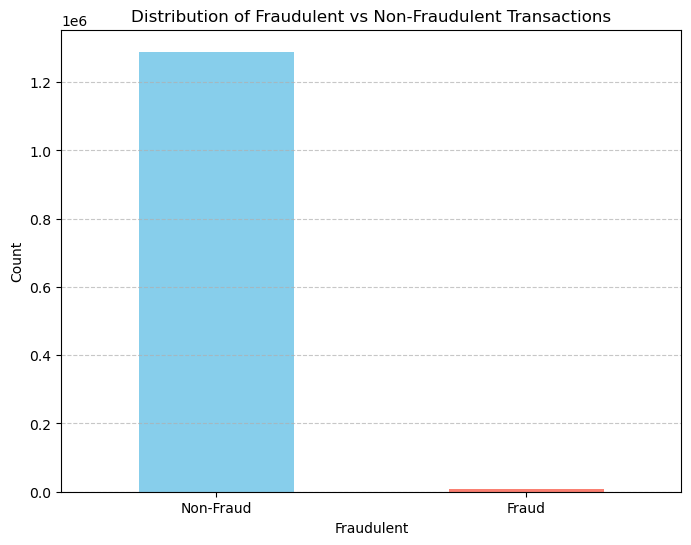

In [49]:
# Plot the distribution of fraud and non-fraud transactions
plt.figure(figsize=(8, 6))
transactions_df['is_fraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

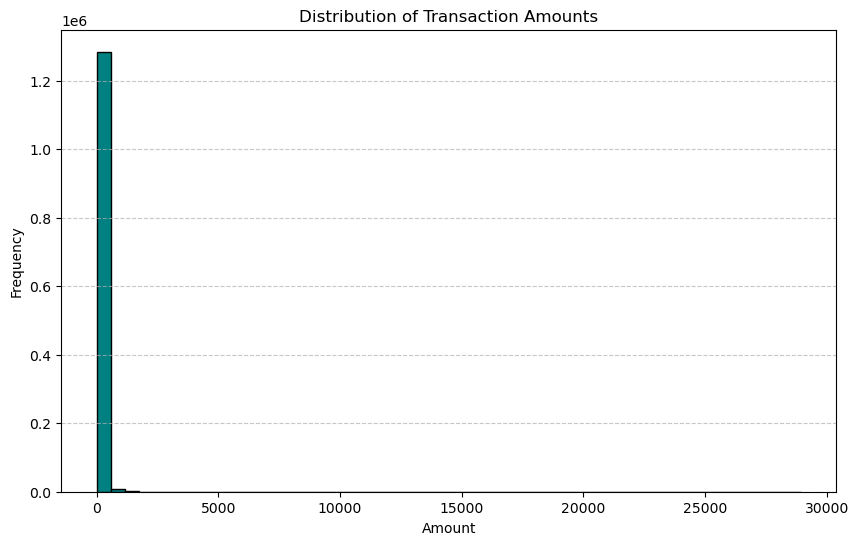

In [50]:
# Plot distribution of transaction amounts
plt.figure(figsize=(10, 6))
transactions_df['amt'].plot(kind='hist', bins=50, color='teal', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

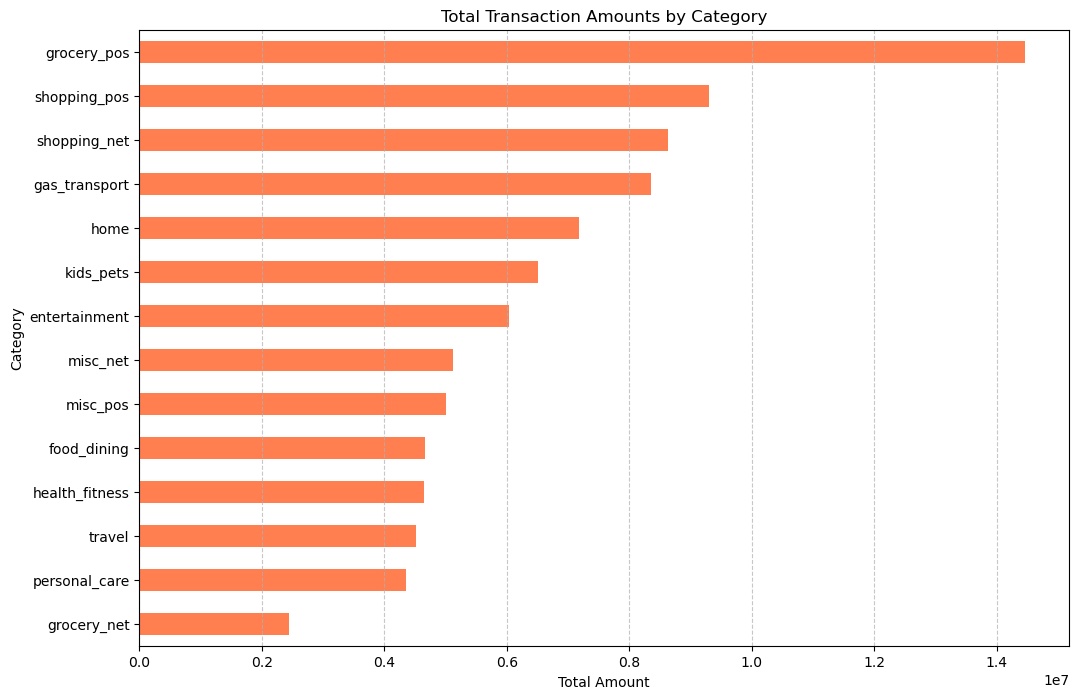

In [51]:
# Plot transaction amounts by category
plt.figure(figsize=(12, 8))
transactions_df.groupby('category')['amt'].sum().sort_values().plot(kind='barh', color='coral')
plt.title('Total Transaction Amounts by Category')
plt.xlabel('Total Amount')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

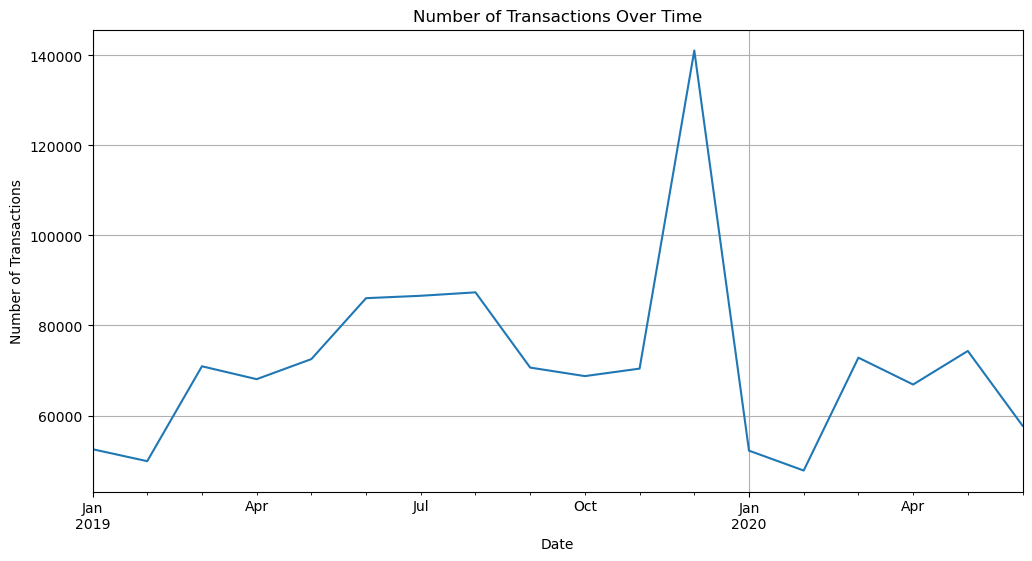

In [56]:
# Convert transaction date and time to datetime format
transactions_df['trans_date_trans_time'] = pd.to_datetime(transactions_df['trans_date_trans_time'])

# Plot number of transactions over time
plt.figure(figsize=(12, 6))
transactions_df.set_index('trans_date_trans_time').resample('M').size().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

In [69]:
import geopandas as gpd
import geodatasets
from shapely.geometry import Point

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [71]:
transactions_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [73]:

# Ensure the relevant columns are present
if 'is_fraud' not in transactions_df.columns or 'amt' not in transactions_df.columns:
    raise ValueError("Dataset must contain 'is_fraud' and 'transaction_amount' columns")

# Calculate the total number of transactions
total_transactions = len(transactions_df)

# Calculate the number of fraudulent transactions
fraud_transactions = transactions_df[transactions_df['is_fraud'] == 1]
num_fraud_transactions = len(fraud_transactions)

# Calculate the percentage of fraudulent transactions
percentage_fraud = (num_fraud_transactions / total_transactions) * 100

# Calculate the total transaction amount
total_amount = transactions_df['amt'].sum()

# Calculate the total fraudulent transaction amount
fraud_amount = fraud_transactions['amt'].sum()

# Calculate the percentage of fraudulent amount
percentage_fraud_amount = (fraud_amount / total_amount) * 100

# Print the results
print(f"Total transactions: {total_transactions}")
print(f"Number of fraudulent transactions: {num_fraud_transactions}")
print(f"Percentage of fraudulent transactions: {percentage_fraud:.2f}%")
print(f"Total transaction amount: ${total_amount:,.2f}")
print(f"Total fraudulent transaction amount: ${fraud_amount:,.2f}")
print(f"Percentage of fraudulent transaction amount: {percentage_fraud_amount:.2f}%")

Total transactions: 1296675
Number of fraudulent transactions: 7506
Percentage of fraudulent transactions: 0.58%
Total transaction amount: $91,222,428.90
Total fraudulent transaction amount: $3,988,088.61
Percentage of fraudulent transaction amount: 4.37%


: 

In [67]:
# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(transactions_df['merch_long'], transactions_df ['merch_lat'])]
geo_df = gpd.GeoDataFrame(transactions_df, geometry=geometry)

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot transactions on map
plt.figure(figsize=(14, 10))
ax = world.plot(ax=plt.gca(), color='lightgrey')
geo_df.plot(ax=ax, markersize=5, color='red', alpha=0.5)
plt.title('Geographic Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [25]:
# Rename the column
transactions_df = transactions_df.rename(columns={'Unnamed: 0': 'cardnumber'})
transactions_df

,cardnumber,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [27]:
def haversine(long, lat, merch_long, merch_lat):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    long, lat, merch_long, merch_lat = map(np.radians, [long, lat, merch_long, merch_lat])

    # Haversine formula 
    dlon = merch_long - long 
    dlat = merch_lat - lat
    a = np.sin(dlat/2)**2 + np.cos(lat) * np.cos(merch_lat) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    km = 6371 * c  # Radius of Earth in kilometers
    return km

# Calculate the distance and add it as a new column
transactions_df['distance_km'] = transactions_df.apply(
    lambda row: haversine(row['long'], row['lat'], 
                          row['merch_long'], row['merch_lat']), axis=1)

In [28]:
transactions_df

,cardnumber,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,distance_km
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,78.597568
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,30.212176
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,108.206083
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,95.673231
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,77.556744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN,119.752136
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0,75.104085
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0,99.047734
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0,84.627652


In [35]:
from tqdm import tqdm
# Load the DataFrame into the MySQL table
#transactions_df.to_sql('transactions', con=engine, if_exists='append', index=False)

# Define the chunk size
chunk_size = 1000
# Get the total number of chunks
total_chunks = (len(transactions_df) // chunk_size) + 1
# Use tqdm to show the progress bar
with tqdm(total=total_chunks, desc='Loading Data into MySQL') as pbar:
    for i in range(total_chunks):
        # Get the chunk
        chunk = transactions_df.iloc[i * chunk_size:(i + 1) * chunk_size]
        
        # Load the chunk into the MySQL table
        chunk.to_sql('transactions', con=engine, if_exists='append', index=False)
        
        # Update the progress bar
        pbar.update(1)

Loading Data into MySQL: 100%|██████████| 1297/1297 [05:15<00:00,  4.11it/s]


In [33]:
# Drop the index column
transactions_df = transactions_df.drop(columns=['index'], errors='ignore')
transactions_df.shape

(1296675, 24)

In [12]:
transactions_df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN


In [32]:
# Load the card_holders table into a DataFrame
card_holders_df = pd.read_sql('SELECT * FROM card_holders', con=engine)

In [33]:
# Calculate the Age
current_year = datetime.now().year
card_holders_df['Age'] = current_year - pd.to_datetime(card_holders_df['dob']).dt.year


In [34]:
# Calculate the age_range
def calculate_age_range(age):
    lower_bound = (age // 5) * 5
    upper_bound = lower_bound + 4
    return f"{lower_bound}-{upper_bound}"

In [35]:
card_holders_df['age_range'] = card_holders_df['Age'].apply(calculate_age_range)

In [42]:
# Add the new columns to the table if they don't exist
with engine.connect() as conn:
    conn.execute('''
        ALTER TABLE card_holders
        ADD COLUMN IF NOT EXISTS Age INT,
        ADD COLUMN IF NOT EXISTS age_range VARCHAR(10)
    ''')

# Update the card_holders table with the new columns
update_query = '''
    UPDATE card_holders
    SET Age = %s, age_range = %s
    WHERE CC_num = %s
'''

# Execute the update query in batches
batch_size = 1000
for start in range(0, len(card_holders_df), batch_size):
    batch = card_holders_df.iloc[start:start+batch_size]
    data = list(batch[['Age', 'age_range', 'CC_num']].itertuples(index=False, name=None))
    with engine.connect() as conn:
        conn.execute(update_query, data)

ObjectNotExecutableError: Not an executable object: '\n        ALTER TABLE card_holders\n        ADD COLUMN IF NOT EXISTS Age INT,\n        ADD COLUMN IF NOT EXISTS age_range VARCHAR(10)\n    '